## Competição da base de dados do Titanic na plataforma do Kaggle.
- O objetivo desta competição é usar o aprendizado de máquina para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic.

- Os dados usados nesse projeto estão disponíveis nesse [link](https://www.kaggle.com/c/titanic) no site do [Kaggle.](https://https://www.kaggle.com/)



## Importação das bibliotecas, montagem do Drive e importação da base

In [37]:
#IMPORT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [38]:
# MONTANDO O DRIVE
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# BASES
train = pd.read_csv("https://raw.githubusercontent.com/RafaelLopes01/titanic-kaggle/master/data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/RafaelLopes01/titanic-kaggle/master/data/test.csv")

## Tratamento dos Dados

In [40]:
# 5 REGISTROS ALEATÓRIOS DA BASE
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,4134,9.5875,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.00,1,1,F.C.C. 13529,26.2500,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


In [41]:
# VERIFICANDO SE TEM DADOS DUPLICADOS
sum(train.duplicated())

0

In [42]:
# VERIFICANDO OS TIPOS DE DADOS
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
# VERIFICANDO OS VALORES NULOS
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
# VERIFICANDO A MEDIA DAS IDADES
train['Age'].mean()

29.69911764705882

In [45]:
# MUDANDO A VARIAVEL 'Cabin' PARA NULA OU NÃO
train['Cabin_nula'] = train['Cabin'].isnull().astype(int)
test['Cabin_nula'] = test['Cabin'].isnull().astype(int)

In [46]:
#VERIFICANDO OS VALORES UNICOS NA VARIAVEL 'Embarked'
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
# ADICIONANDO NOVAS VARIAVEIS NA BASE DE TREINO
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)
# ADICIONANDO NOVAS VARIAVEIS NA BASE DE TESTE
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

In [48]:
# SELECIONANDO AS VARIAVEIS DA BASE DE TREINO.
variaveis_treino = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin_nula','Embarked_S','Embarked_C','Embarked_Q','Survived']

# SELECIONANDO AS VARIAVEIS DA BASE DE TESTE
variaveis_test = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin_nula','Embarked_S','Embarked_C','Embarked_Q']

In [49]:
# ATRIBUINDO AS VARIAVEIS PARA OS DATASETS.
train = train[variaveis_treino]
dados_test = test[variaveis_test]
dados_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_nula,Embarked_S,Embarked_C,Embarked_Q
178,2,female,36.0,0,3,39.00,0,1,0,0
370,2,male,21.0,1,0,11.50,1,1,0,0
273,3,female,NaN,1,0,15.50,1,0,0,1
182,1,female,18.0,1,0,53.10,0,1,0,0
221,3,male,21.0,0,0,8.05,1,1,0,0


In [50]:
train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_nula,Embarked_S,Embarked_C,Embarked_Q,Survived
683,3,male,14.0,5,2,46.900,1,1,0,0,0
542,3,female,11.0,4,2,31.275,1,1,0,0,0
160,3,male,44.0,0,1,16.100,1,1,0,0,0
528,3,male,39.0,0,0,7.925,1,1,0,0,0
574,3,male,16.0,0,0,8.050,1,1,0,0,0


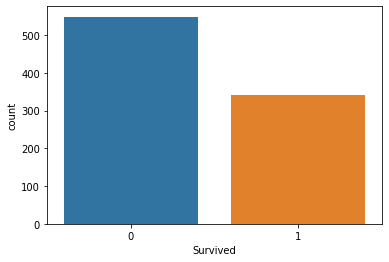

In [51]:
# MORTOS X SOBREVIVENTES NA BASE DE TREINO
ax = sns.countplot(x=train.Survived)

Neste exemplo conseguimos ver que a maior parte das pessoas a bordo do navio não sobreviveu, pois os valores setados com 0 são de não sobreviventes e os valores 1 de sobreviventes.

In [52]:
# DIVISÃO DO DATASET ENTRE PREVISORES E CLASSE.
previsores = train.iloc[: , 0:10].values
classe = train.iloc[:, 10].values
dados_test = dados_test.iloc[:, 0:10].values

In [53]:
previsores

array([[3, 'male', 22.0, ..., 1, 0, 0],
       [1, 'female', 38.0, ..., 0, 1, 0],
       [3, 'female', 26.0, ..., 1, 0, 0],
       ...,
       [3, 'female', nan, ..., 1, 0, 0],
       [1, 'male', 26.0, ..., 0, 1, 0],
       [3, 'male', 32.0, ..., 0, 0, 1]], dtype=object)

In [54]:
dados_test

array([[3, 'male', 34.5, ..., 0, 0, 1],
       [3, 'female', 47.0, ..., 1, 0, 0],
       [2, 'male', 62.0, ..., 0, 0, 1],
       ...,
       [3, 'male', 38.5, ..., 1, 0, 0],
       [3, 'male', nan, ..., 1, 0, 0],
       [3, 'male', nan, ..., 0, 1, 0]], dtype=object)

In [55]:
# TRANSFORMANDO OS ATRIBUTOS
labelencoder_previsores = LabelEncoder()
labelencoder_test = LabelEncoder()

In [56]:
previsores[:,1] = labelencoder_previsores.fit_transform(previsores[:,1])

In [57]:
dados_test[:,1] = labelencoder_test.fit_transform(dados_test[:,1])

In [58]:
dados_test

array([[3, 1, 34.5, ..., 0, 0, 1],
       [3, 0, 47.0, ..., 1, 0, 0],
       [2, 1, 62.0, ..., 0, 0, 1],
       ...,
       [3, 1, 38.5, ..., 1, 0, 0],
       [3, 1, nan, ..., 1, 0, 0],
       [3, 1, nan, ..., 0, 1, 0]], dtype=object)

In [59]:
# TRATAMENTO DOS VALORES FALTANTES NA BASE DE TREINO.
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
imputer = imputer.fit(previsores)
previsores = imputer.transform(previsores)

In [60]:
# TRATAMENTO DOS VALORES FALTANTES NA BASE DE TESTE
imputer_dados_test = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer_dados_test = imputer_dados_test.fit(dados_test)
dados_test = imputer_dados_test.transform(dados_test)

In [61]:
previsores

array([[ 3.        ,  1.        , 22.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  0.        , 26.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         0.        ,  1.        ]])

In [62]:
# ESCALONAMENTO DOS PREVISORES
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)
previsores

array([[ 0.82737724,  0.73769513, -0.5924806 , ...,  0.61930636,
        -0.48204268, -0.30756234],
       [-1.56610693, -1.35557354,  0.63878901, ..., -1.61470971,
         2.0745051 , -0.30756234],
       [ 0.82737724, -1.35557354, -0.2846632 , ...,  0.61930636,
        -0.48204268, -0.30756234],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  0.61930636,
        -0.48204268, -0.30756234],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -1.61470971,
         2.0745051 , -0.30756234],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -1.61470971,
        -0.48204268,  3.25137334]])

In [63]:
# ESCALONAMENTO BASE DE TESTE
dados_test = scaler.fit_transform(dados_test)
dados_test

array([[ 0.87348191,  0.75592895,  0.3349926 , ..., -1.35067551,
        -0.56814154,  2.84375747],
       [ 0.87348191, -1.32287566,  1.32553003, ...,  0.74037028,
        -0.56814154, -0.35164743],
       [-0.31581919,  0.75592895,  2.51417495, ..., -1.35067551,
        -0.56814154,  2.84375747],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, ...,  0.74037028,
        -0.56814154, -0.35164743],
       [ 0.87348191,  0.75592895,  0.        , ...,  0.74037028,
        -0.56814154, -0.35164743],
       [ 0.87348191,  0.75592895,  0.        , ..., -1.35067551,
         1.76012477, -0.35164743]])

## Criação do Modelo

Validação Cruzada

In [64]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.30, random_state=0) 

Modelos

In [65]:
# Randon Forest
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [ ]:
# Rede Neural
from sklearn.neural_network import MLPClassifier
modelo = MLPClassifier(verbose = True,
                              max_iter = 100,
                              tol = 0.000010,
                              solver = 'adam',
                              hidden_layer_sizes = (100),
                              activation = 'relu')


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Regressão Logistica
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression(random_state= 1)

In [ ]:
#SVM
from sklearn.svm import SVC
modelo = SVC(kernel='linear', random_state=1)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p=2)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

Treino

In [66]:
#TREINO MODELO DE TESTES
modelo.fit(previsores_treinamento, classe_treinamento)
previsoes = modelo.predict(previsores_teste)

In [67]:
#TREINO MODELO FINAL
modelo.fit(previsores, classe)
p = modelo.predict(dados_test)

Validação

In [70]:
# MATRIZ DE CONFUSÃO E ACURÁCIA DOS DADOS DE TESTES
from sklearn.metrics import confusion_matrix, accuracy_score

precisao = accuracy_score(classe_teste, previsoes)
matrix = confusion_matrix(classe_teste, previsoes)
matrix

array([[150,  18],
       [ 25,  75]])

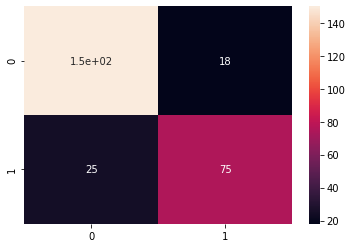

In [69]:
sns.heatmap(matrix, annot=True)

In [ ]:
precisao

0.7910447761194029

## Criar Submission


In [ ]:
# CRIAR O CAMPO 'Surived' DOS DADOS DE TESTE PARA ENVIAR PARA O KAGGLE.
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [ ]:
sub.to_csv("RandonForest.csv",header=True)

### **Resultados**
---
Randon Forest - 0.8385650224215246 | Melhorando o escalonamento - 0.8430493273542601 | Resultado Kaggle 0.76076

MLPClassifier - 0.8071748878923767 | Melhorando o escalonamento - 0.8295964125560538 | Resultado Kaggle 0.78468

DecisionTree - 0.7668161434977578

LogisticRegression - 0.7937219730941704

SVM - 0.7802690582959642

KNN - 0.7982062780269058

Naive Bayes - 0.7802690582959642
